In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import uuid
import os
import time

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path = 'yolov5/runs/train/exp21/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\darks/.cache\torch\hub\master.zip
YOLOv5  2022-11-8 Python-3.9.12 torch-1.12.1 CUDA:0 (NVIDIA GeForce RTX 3060, 12287MiB)

Fusing layers... 
Model summary: 322 layers, 86220517 parameters, 0 gradients, 203.9 GFLOPs
Adding AutoShape... 


In [17]:
img = os.path.join('data', 'images', 'C:/Users/darks/Downloads/jerry1.jpg')

In [18]:
results = model(img)

In [19]:
results.print()

image 1/1: 112x112 (no detections)
Speed: 39.1ms pre-process, 264.3ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)


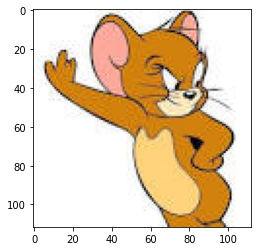

In [20]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

# Real Time WebCamera

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    #make detections
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()